## 对Boston房价数据集中房间数与房价之间的简单线性回归模型训练和预测，并可视化结果。

/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

[[9.01867888]] [-34.20143988]


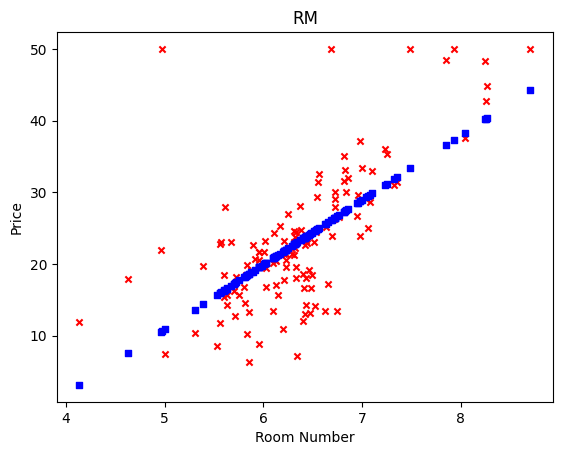

In [1]:
#code-4-2.py

# 导入所需库和模块
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# 加载Boston房价数据集
dataset = load_boston()
x_data = dataset.data  # 导入所有特征变量
y_data = dataset.target  # 导入目标值（房价）
name_data = dataset.feature_names  # 导入特征

# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=1001)

# 提取训练集和测试集的房间数特征
x_data_train = x_train[:, 5].reshape(-1, 1)  # 选取前400个样本作为训练集
y_data_train = y_train.reshape(-1, 1)
x_data_test = x_test[:, 5].reshape(-1, 1)  # 选取剩余的样本作为测试集
y_data_test = y_test.reshape(-1, 1)

# 创建线性回归模型实例
simple_model = LinearRegression()
simple_model.fit(x_data_train, y_data_train)  # 使用训练数据拟合模型
y_data_test_p = simple_model.predict(x_data_test)  # 使用训练好的模型对测试集进行预测

# 打印回归系数和截距
print(simple_model.coef_, simple_model.intercept_)

# 绘制散点图和拟合线
plt.subplot(1, 1, 1)
plt.scatter(x_data_test, y_data_test, s=20, color="r", marker="x")  # 绘制测试集的真实值散点图
plt.scatter(x_data_test, y_data_test_p, s=20, color="b", marker="s")  # 绘制预测值散点图
plt.xlabel('Room Number')  # 设置x轴标签为房间数
plt.ylabel('Price')  # 设置y轴标签为房价
plt.title(name_data[5])  # 设置图标题为特征名称中的第5个特征
plt.show()  # 显示图形
